<a href="https://colab.research.google.com/github/JankoBascarevic/Masinsko-Ucenje/blob/main/Neuronska_mreza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [13]:
data = pd.read_csv("./sample_data/mnist_train_small.csv")

In [14]:
from sklearn.model_selection import train_test_split
data = data.rename(columns={"6": "label"})
data.head()
print(data.shape)

train, test = train_test_split(data, test_size=0.2)

(19999, 785)


array([[<Axes: title={'center': 'label'}>]], dtype=object)

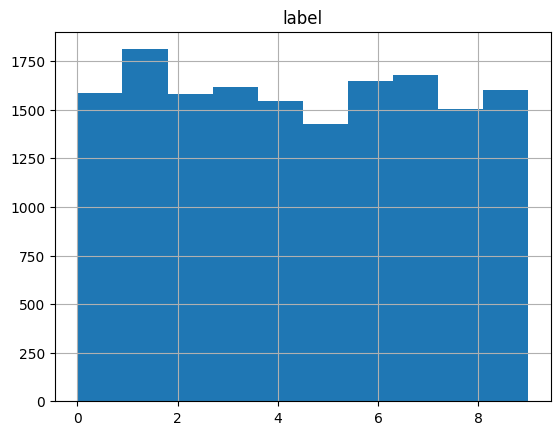

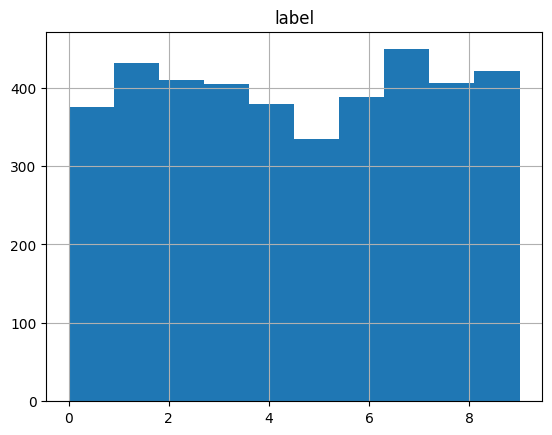

In [15]:
train.hist(column='label')
test.hist(column="label")

In [16]:
train = np.array(train)
test = np.array(test)

train = train.T

In [17]:
y_train = train[0]
X_train = train[1:]
print(X_train.shape)
m = X_train.shape[1]
X_train = X_train / 255
print(y_train)

(784, 15999)
[6 9 2 ... 2 9 5]


In [18]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [19]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.001, 100)

Iteration:  0
[1 8 3 ... 7 3 3] [6 9 2 ... 2 9 5]
0.08088005500343771
Iteration:  10
[1 8 3 ... 7 3 3] [6 9 2 ... 2 9 5]
0.0807550471904494
Iteration:  20
[1 8 3 ... 7 3 3] [6 9 2 ... 2 9 5]
0.07937996124757797
Iteration:  30
[1 8 3 ... 7 3 3] [6 9 2 ... 2 9 5]
0.07944246515407213
Iteration:  40
[1 8 3 ... 7 3 3] [6 9 2 ... 2 9 5]
0.07881742608913057
Iteration:  50
[1 8 3 ... 7 3 3] [6 9 2 ... 2 9 5]
0.07881742608913057
Iteration:  60
[1 8 3 ... 7 3 3] [6 9 2 ... 2 9 5]
0.07850490655665979
Iteration:  70
[1 8 3 ... 7 3 3] [6 9 2 ... 2 9 5]
0.07837989874367148
Iteration:  80
[1 8 3 ... 7 3 3] [6 9 2 ... 2 9 5]
0.07825489093068316
Iteration:  90
[1 8 3 ... 7 3 3] [6 9 2 ... 2 9 5]
0.0790674417151072


In [20]:
import torch.nn.functional as F
def fit(X, y, model, epoch, loss_fn, opt):
    ohy = F.one_hot(y.to(torch.int64), 10).float()
    for i in range(epoch):
        loss = loss_fn(model.forward(X), ohy)
        loss.backward()
        opt.step()
        opt.zero_grad()
        # log performanse modela
        out = model.predict(X)
        print(out)
        print(y)
        acc = accuracy(out, y)
        print("Accuracy: ", acc)

def accuracy(pred, actual):
    s = torch.sum(pred == actual)
    return s.item() / len(actual)

In [21]:
import torch.optim as optim
import torch.nn.functional as F
import torch
model = Model()
epochs = 100
lr = 1e-3
opt = optim.Adam(model.parameters(), lr=lr)
loss = F.cross_entropy

X = torch.from_numpy(X_train.T).float()
y = torch.from_numpy(y_train).long()
fit(X, y, model, epochs, loss, opt)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([6, 0, 3,  ..., 8, 4, 8])
tensor([6, 9, 2,  ..., 2, 9, 5])
Accuracy:  0.29395587224201514
tensor([6, 0, 8,  ..., 8, 4, 8])
tensor([6, 9, 2,  ..., 2, 9, 5])
Accuracy:  0.4739046190386899
tensor([6, 0, 8,  ..., 0, 4, 8])
tensor([6, 9, 2,  ..., 2, 9, 5])
Accuracy:  0.5763485217826114
tensor([6, 0, 2,  ..., 2, 4, 8])
tensor([6, 9, 2,  ..., 2, 9, 5])
Accuracy:  0.6244140258766173
tensor([6, 0, 2,  ..., 2, 3, 8])
tensor([6, 9, 2,  ..., 2, 9, 5])
Accuracy:  0.649978123632727
tensor([6, 0, 2,  ..., 2, 3, 8])
tensor([6, 9, 2,  ..., 2, 9, 5])
Accuracy:  0.6651040690043127
tensor([6, 0, 2,  ..., 2, 4, 8])
tensor([6, 9, 2,  ..., 2, 9, 5])
Accuracy:  0.6709794362147634
tensor([6, 0, 2,  ..., 2, 4, 8])
tensor([6, 9, 2,  ..., 2, 9, 5])
Accuracy:  0.6736671041940121
tensor([6, 0, 2,  ..., 2, 4, 8])
tensor([6, 9, 2,  ..., 2, 9, 5])
Accuracy:  0.6689793112069504
tensor([6, 0, 2,  ..., 2, 3, 8])
tensor([6, 9, 2,  ..., 2, 9, 5])
Accuracy:  0.6632914557159822
tensor([6, 0, 2,  ..., 2, 3, 8])
tensor(